# Diabetes Data Analysis

### Collecting Data

In [1]:
#import required packages
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#import required dataset into pandas dataframe
data = pd.read_csv('E:\Datasets\diabetes-dataset.csv')

In [3]:
#printing dataset shape
print("Dataset Shape : ", data.shape)
#printing dataset observations
data.head()

Dataset Shape :  (2000, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


### Analyzing Data

In [4]:
#obtaining the information on the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
#obtaining descriptive information about the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [6]:
#view unique values of a feature
data.Outcome.unique()

array([1, 0], dtype=int64)

### Visualizing Data

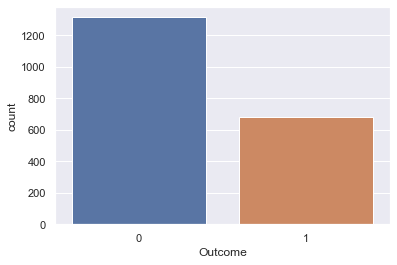

In [7]:
#present data of Outcome variable using bar plot
sns.set()
sns.countplot(data["Outcome"])

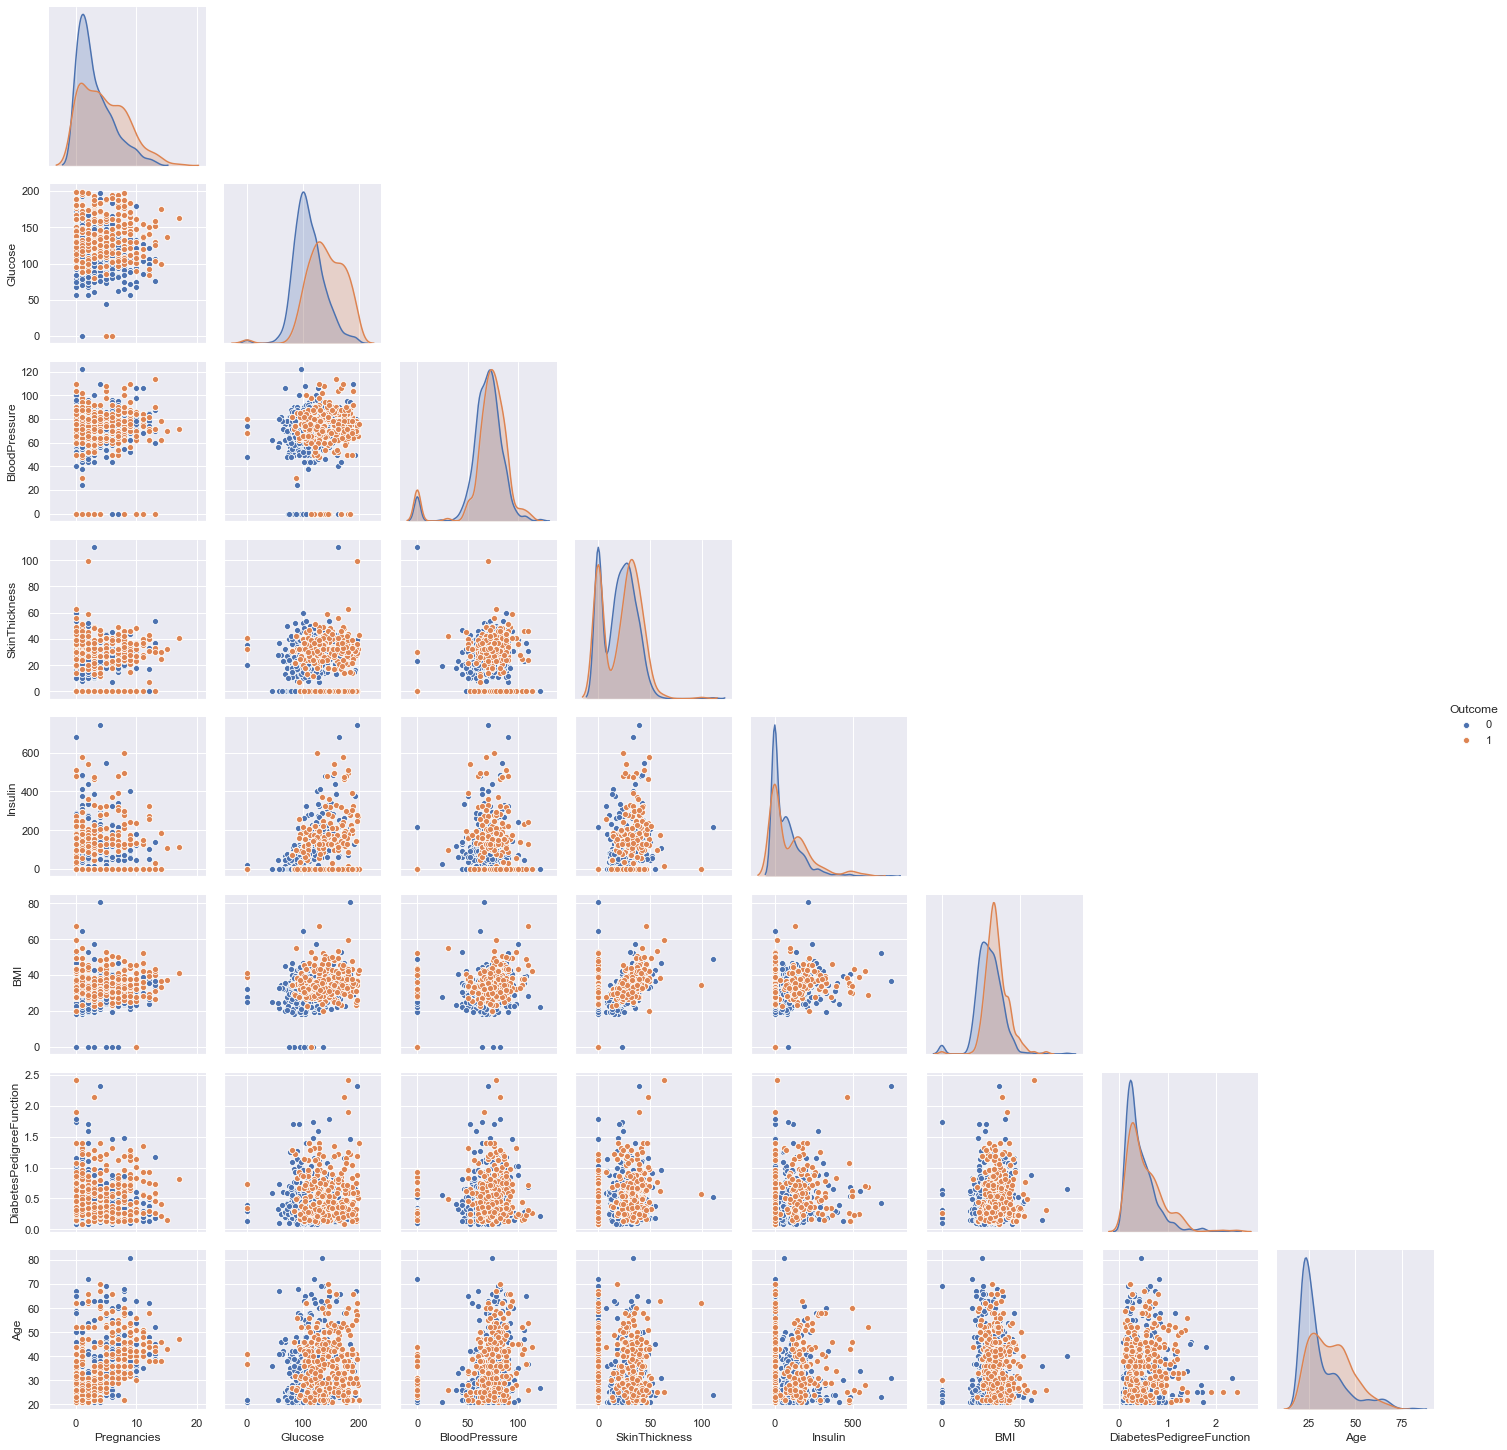

In [8]:
#present the data as whole
sns.pairplot(data, hue='Outcome', corner=True)

### Data Wrangling

In [9]:
#present the count of duplicate values
data.duplicated().sum()

1256

In [10]:
#remove duplicate data from the datframe
data.drop_duplicates(inplace=True)

In [11]:
#printing dataset shape after duplicates removed
print("Dataset Shape after removing duplicate values: ", data.shape)

Dataset Shape after removing duplicate values:  (744, 9)


### Train and Test Data

**Splitting the Data**

In [12]:
#Separating the dependent and independent variable
X = data.drop('Outcome', axis=1)
Y = data['Outcome']

#Splitting the dataset into test data and train data
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=1)

**Scaling the Data**

In [13]:
#keep aside original column names
original_columns = X.columns

In [14]:
#create a scaler object and scale the training data
sc=StandardScaler()
x_train = sc.fit_transform(x_train)

In [15]:
#convert the scaled data into dataframe and assign original column names
x_train= pd.DataFrame(x_train)
x_train.columns = original_columns

In [16]:
#view scaled dataframe
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.626288,0.746664,0.967051,0.837589,0.814407,-0.232022,0.923047,1.764832
1,-0.801182,-1.564810,0.472979,1.816620,-0.301538,0.134892,-0.153836,-1.036542
2,1.322854,0.153177,0.967051,0.959968,0.284333,0.805458,-0.379087,1.414660
3,2.536589,-1.033796,0.275350,1.204725,-0.217842,0.400588,-0.289604,1.327117
4,-0.801182,0.871608,-0.021093,0.531642,0.461025,-0.358543,-0.379087,0.801860


**Train the Logistic Regression Model**

In [17]:
#create the model object
logmodel = LogisticRegression()
#fit the model to the training data
logmodel.fit(x_train,y_train)

LogisticRegression()

### Evaluate the Model

Training Score:  0.7634615384615384
Testing Score:   0.3125
Accuracy Score :  0.3125
Confusion Matrix:


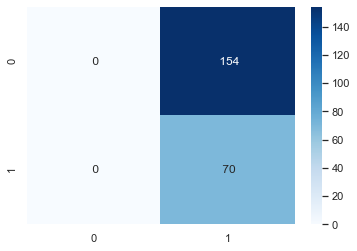

In [18]:
#predict the values for test data
y_pred = logmodel.predict(x_test)

#view results for the model
print("Training Score: ", logmodel.score(x_train, y_train))
print("Testing Score:  ", logmodel.score(x_test, y_test))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=' ', cmap='Blues')

### Improve the Model Using Interaction Variables

**Add Interaction Variables to the Dataset**

In [19]:
#function to add interaction terms between columns to dataframe
#the function accepts original dataframe and returns original data with interaction terms appended
def add_interactions(X):
    features = X.columns
    m = len(features)
    X_copy = X.copy(deep=True)
    #loop through all features in the original dataframe X
    for i in range(m):
        #get the name of ith feature
        feature_i_name = features[i]
        #get the data for ith feature
        feature_i_data = X_copy[feature_i_name]
        #choose the index of column-j such that it is greater than column-i
        for j in range(i+1, m):
            #get the name of jth feature
            feature_j_name = features[j]
            #get the data for jth feature
            feature_j_data = X_copy[feature_j_name]
            # create the name of the interaction feature by combining both names
            feature_i_j_name = f"{feature_i_name}_x_{feature_j_name}"
            #multiply the data for feature 'i' and feature 'j' and store the result as a column in dataframe X_copy
            X_copy[feature_i_j_name] = feature_i_data * feature_j_data
    return X_copy

In [20]:
#add interaction variables to 
X_train_int = add_interactions(x_train)
X_test_int = add_interactions(x_test)

In [21]:
#view training data with interactions
X_train_int.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_x_Glucose,Pregnancies_x_BloodPressure,...,SkinThickness_x_Insulin,SkinThickness_x_BMI,SkinThickness_x_DiabetesPedigreeFunction,SkinThickness_x_Age,Insulin_x_BMI,Insulin_x_DiabetesPedigreeFunction,Insulin_x_Age,BMI_x_DiabetesPedigreeFunction,BMI_x_Age,DiabetesPedigreeFunction_x_Age
0,1.626288,0.746664,0.967051,0.837589,0.814407,-0.232022,0.923047,1.764832,1.214290,1.572703,...,0.682138,-0.194339,0.773134,1.478204,-0.188960,0.751736,1.437292,-0.214167,-0.409479,1.629023
1,-0.801182,-1.564810,0.472979,1.816620,-0.301538,0.134892,-0.153836,-1.036542,1.253697,-0.378942,...,-0.547779,0.245047,-0.279462,-1.883003,-0.040675,0.046387,0.312556,-0.020751,-0.139821,0.159458
2,1.322854,0.153177,0.967051,0.959968,0.284333,0.805458,-0.379087,1.414660,0.202631,1.279268,...,0.272951,0.773213,-0.363911,1.358028,0.229019,-0.107787,0.402235,-0.305338,1.139449,-0.536279
3,2.536589,-1.033796,0.275350,1.204725,-0.217842,0.400588,-0.289604,1.327117,-2.622315,0.698450,...,-0.262439,0.482598,-0.348893,1.598812,-0.087265,0.063088,-0.289102,-0.116012,0.531627,-0.384338
4,-0.801182,0.871608,-0.021093,0.531642,0.461025,-0.358543,-0.379087,0.801860,-0.698316,0.016899,...,0.245100,-0.190617,-0.201538,0.426302,-0.165297,-0.174768,0.369677,0.135919,-0.287502,-0.303974


In [22]:
#view testing data with interactions
X_test_int.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_x_Glucose,Pregnancies_x_BloodPressure,...,SkinThickness_x_Insulin,SkinThickness_x_BMI,SkinThickness_x_DiabetesPedigreeFunction,SkinThickness_x_Age,Insulin_x_BMI,Insulin_x_DiabetesPedigreeFunction,Insulin_x_Age,BMI_x_DiabetesPedigreeFunction,BMI_x_Age,DiabetesPedigreeFunction_x_Age
549,4,189,110,31,0,28.5,0.680,37,756,440,...,0,883.5,21.080,1147,0.0,0.00,0,19.3800,1054.5,25.160
394,4,158,78,0,0,32.9,0.803,31,632,312,...,0,0.0,0.000,0,0.0,0.00,0,26.4187,1019.9,24.893
19,3,84,72,32,0,37.2,0.267,28,252,216,...,0,1190.4,8.544,896,0.0,0.00,0,9.9324,1041.6,7.476
214,9,112,82,32,175,34.2,0.260,36,1008,738,...,5600,1094.4,8.320,1152,5985.0,45.50,6300,8.8920,1231.2,9.360
388,5,144,82,26,285,32.0,0.452,58,720,410,...,7410,832.0,11.752,1508,9120.0,128.82,16530,14.4640,1856.0,26.216


In [23]:
#create the model object
logmodel_int = LogisticRegression()
#fit the model to the training data
logmodel_int.fit(X_train_int,y_train)

LogisticRegression()

### Evaluate the Improved Model or View the Interaction Effect

Training Score:  0.7923076923076923
Testing Score:   0.46875
Accuracy Score :  0.46875
Confusion Matrix:


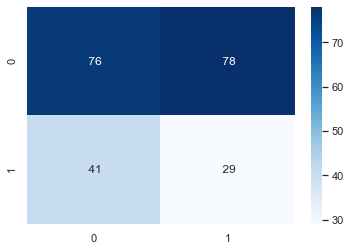

In [24]:
#predict the values for test data
y_pred_int = logmodel_int.predict(X_test_int)

#view results for the model
print("Training Score: ", logmodel_int.score(X_train_int, y_train))
print("Testing Score:  ", logmodel_int.score(X_test_int, y_test))
print("Accuracy Score : ", accuracy_score(y_test,y_pred_int))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test,y_pred_int), annot=True, fmt=' ', cmap='Blues')

**Coefficients Plot to View Variables that made a Difference**

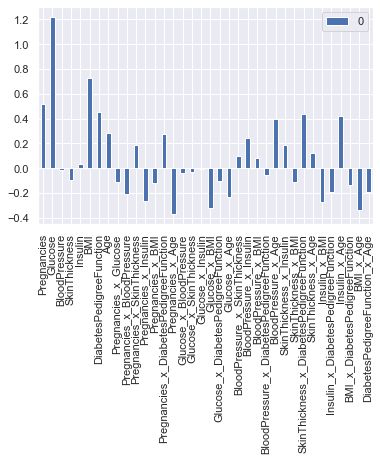

In [25]:
int_coeffs = pd.DataFrame(data = logmodel_int.coef_, columns = X_train_int.columns)
int_coeffs.T.plot.bar();